In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

# Analysis

In [3]:
train=pd.read_csv('train.csv')
display(train.head())

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


blue
0    1010
1     990
Name: blue, dtype: int64


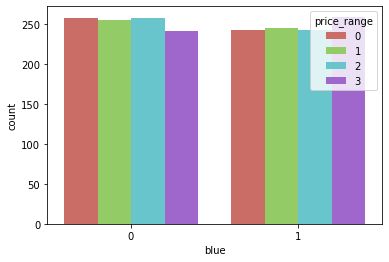

dual_sim
1    1019
0     981
Name: dual_sim, dtype: int64


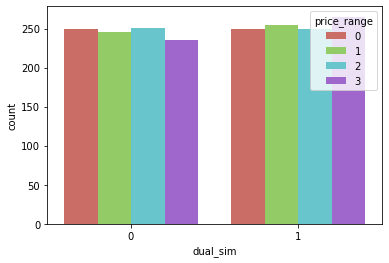

four_g
1    1043
0     957
Name: four_g, dtype: int64


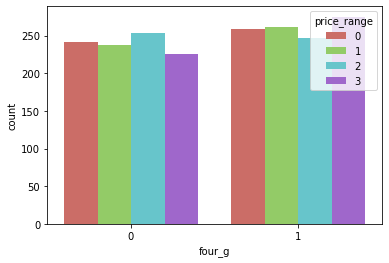

three_g
1    1523
0     477
Name: three_g, dtype: int64


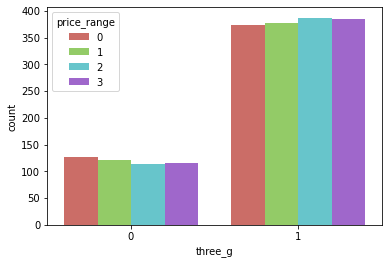

touch_screen
1    1006
0     994
Name: touch_screen, dtype: int64


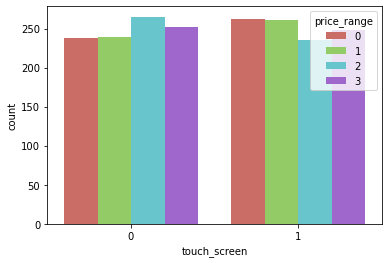

wifi
1    1014
0     986
Name: wifi, dtype: int64


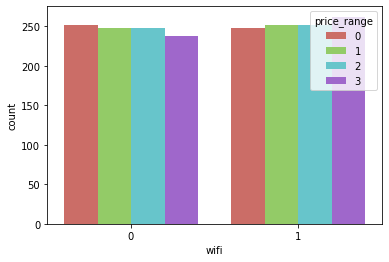

In [18]:
def plotter(x):
    print(train[x].value_counts())
    sns.countplot(x=x,data=train,hue='price_range',palette='hls')
    plt.show()
binary=['blue','dual_sim','four_g','three_g','touch_screen','wifi']
for i in binary:
    print(i)
    plotter(i)

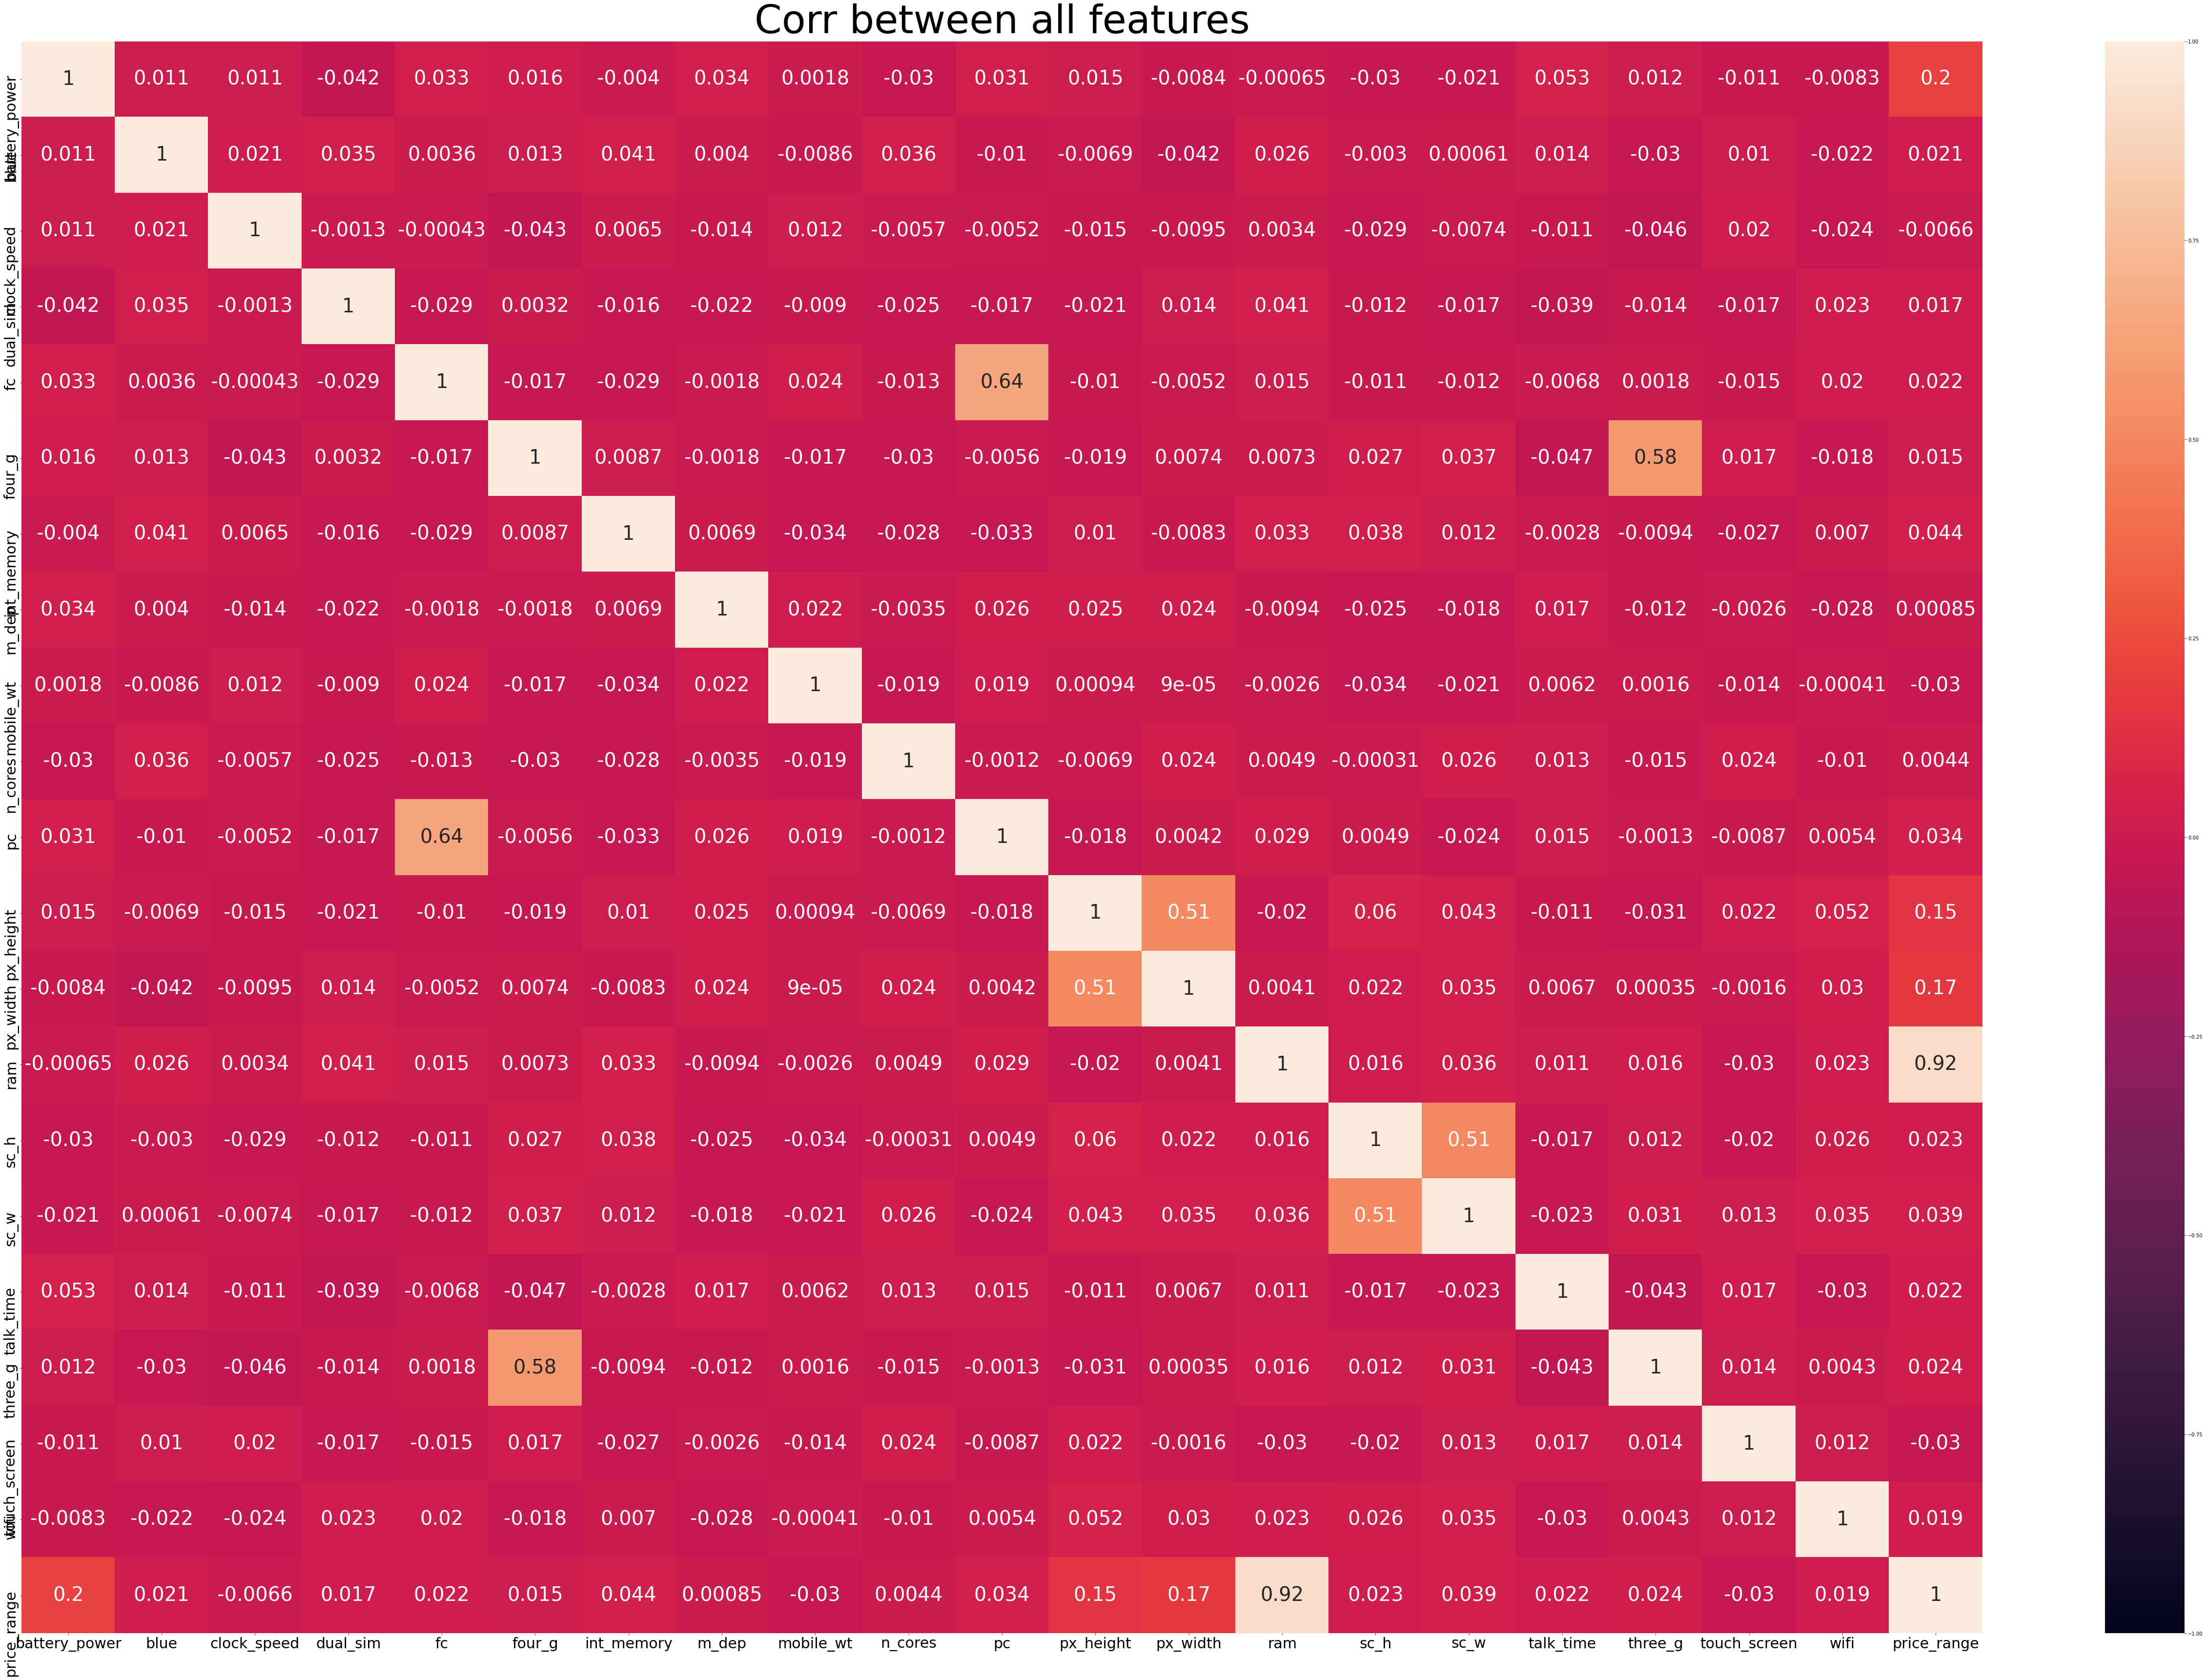

In [8]:
plt.figure(figsize=(90,60))
sns.heatmap(train.corr(),annot=True,annot_kws={"fontsize":40},vmin=-1,vmax=1)
plt.title("Corr between all features",fontsize=80)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# ML

In [9]:
X=train.drop('price_range',axis=1)
Y=train['price_range']
train_X,valid_X,train_Y,valid_Y=train_test_split(X,Y,test_size=0.25,random_state=12345)
print(train_X.shape)
print(train_Y.shape)

(1500, 20)
(1500,)


In [10]:
dtc=DecisionTreeClassifier(random_state=12345)
params={
        'max_depth' : range(1,121,10),
        'min_samples_leaf' : range(1,10),
        'min_samples_split' : range(1,15,2)
}
grid_dtc=GridSearchCV(dtc,params,cv=5)
grid_dtc.fit(train_X,train_Y)
print(grid_dtc.best_params_)

{'max_depth': 11, 'min_samples_leaf': 6, 'min_samples_split': 3}


In [11]:
final_dtc=DecisionTreeClassifier(**grid_dtc.best_params_)
final_dtc.fit(train_X,train_Y)
prediction_ftc=final_dtc.predict(valid_X)
print(accuracy_score(valid_Y,prediction_ftc))

0.844


In [12]:
rfc=RandomForestClassifier(random_state=12345)
params={
    'n_estimators':range(1,42,10),
    'max_depth' : range(1,121,10),
    'min_samples_leaf' : range(1,10),
    'min_samples_split' : range(1,15,2)
}
grid_rfc=GridSearchCV(rfc,params,cv=5)
grid_rfc.fit(train_X,train_Y)
print(grid_rfc.best_params_)

{'max_depth': 21, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 31}


In [13]:
final_rfc=RandomForestClassifier(**grid_rfc.best_params_)
final_rfc.fit(train_X,train_Y)
prediction_rfc=final_rfc.predict(valid_X)
print(accuracy_score(valid_Y,prediction_rfc))

0.87


In [14]:
lr=LogisticRegression(random_state=12345)
lr.fit(train_X,train_Y)
prediction_lr=lr.predict(valid_X)
print(accuracy_score(valid_Y,prediction_lr))

0.66


In [15]:
svc=SVC(random_state=12345)
svc.fit(train_X,train_Y)
prediction_svc=svc.predict(valid_X)
print(accuracy_score(valid_Y,prediction_svc))


0.948


In [15]:
'''unique, counts = np.unique(valid_Y, return_counts=True)
dict(zip(unique, counts))'''

'unique, counts = np.unique(valid_Y, return_counts=True)\ndict(zip(unique, counts))'

In [16]:
catboost=CatBoostClassifier(random_state=12345)
params={
    'depth': range(1,10),
    'iterations':range(100,1001,100),
    'learning_rate':np.arange(0.1,1,0.2)
}
grid_catboost=GridSearchCV(catboost,params)
grid_catboost.fit(train_X,train_Y,verbose=False)
print(grid_catboost.best_params_)

{'depth': 5, 'iterations': 600, 'learning_rate': 0.1}


In [21]:
catboost_final=CatBoostClassifier(random_state=12345,depth=5,iterations=600,learning_rate=0.1)
catboost_final.fit(train_X,train_Y,verbose=False)
prediction_catboost=catboost_final.predict(valid_X)
print(accuracy_score(valid_Y,prediction_catboost))

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0.928


# Final Model

In [ ]:
train_X=train.drop("price_range",axis=1)
train_Y=train["price_range"]
svc=SVC(random_state=12345)
svc.fit(train_X,train_Y)
pickle.dump(svc,open("ml_model.sav","wb"))